$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 1$
---
Katarzyna Wilk gr. 2
---

# 1.1 Function
Consider the following Python class.

In [ ]:
import numpy as np

class Function:
  def __init__(self,n_h,activation=lambda x : x):
    self.f=activation
    self.W0=np.random.randn(n_h,1)*np.sqrt(1/n_h)
    self.b0=np.zeros((n_h,1))
    self.W1=np.random.randn(1,n_h)*np.sqrt(1/n_h)
    self.b1=np.zeros((1,1))

  def __call__(self,x):
    z=self.W0*x+self.b0
    a  = self.f(z)
    y=np.dot(self.W1,a)+self.b1
    return y[0]

x=np.linspace(0,10,100)
f=Function(4)
y=f(x)


Operations placed in the function call operator can be expressed as:


*   $z = W_0\cdot x+b_0$
*   $a = f(z)$
*   $y = W_1*a+b_1$  

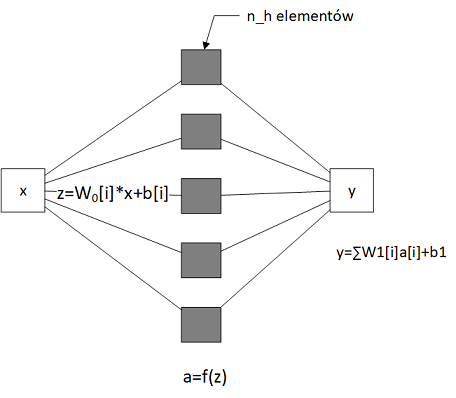

**TODO 1.1.1** Create function objects for various values of ```n_h``` and display their shapes. Use a for loop

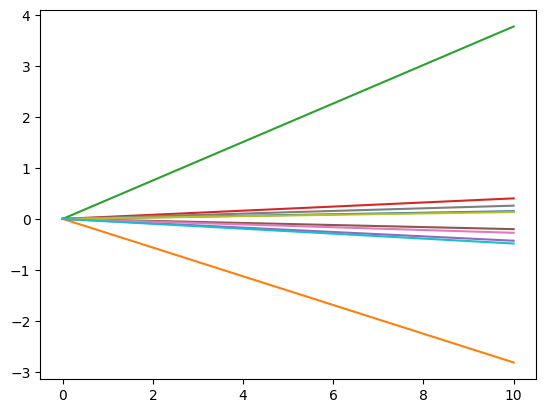

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(10):
  ax.plot(x, Function(n_h = 2**i)(x))

plt.show()

Run the following code.

**Question: What are the shapes of function graphs? Why there are multiple plots?**

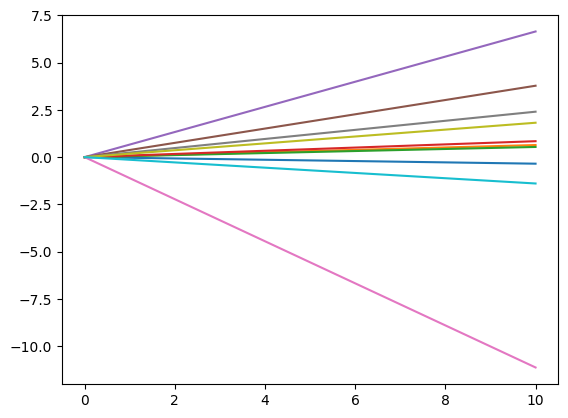

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.plot(x,Function(5)(x))

**TODO 1.1.2** Define two functions:

*   $sigmoid(x)=\frac{1}{1+exp(-x)}$
*   $rbf(x)=exp(-x^2)$



In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def rbf(z):
  return np.exp(-z**2)


then plot their graphs

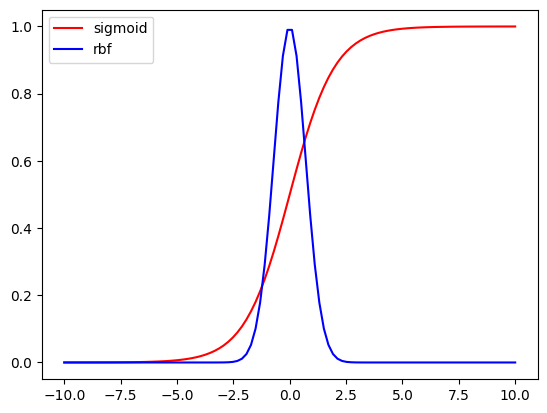

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)

plt.plot(x,sigmoid(x),c='r',label='sigmoid')
plt.plot(x,rbf(x),c='b',label='rbf')
plt.legend()

**TODO 1.1.3** Display several function plots for activation = sigmoid

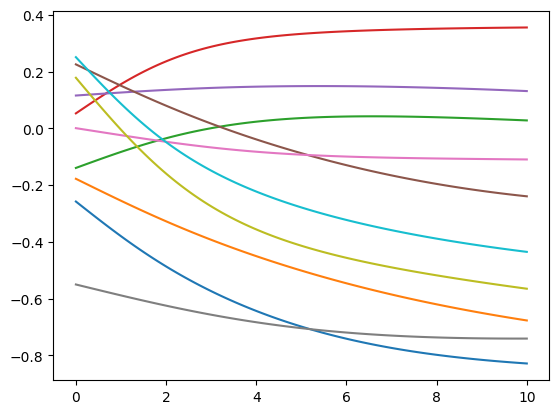

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(0,10,100)
for i in range(10):
  plt.plot(x,Function(7,activation=sigmoid)(x))

**TODO 1.1.4** Display several function plots for activation = rbf

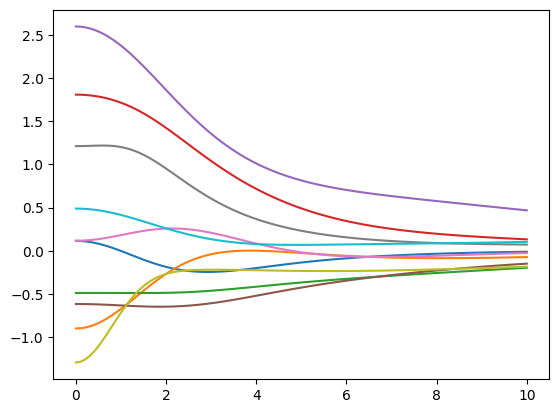

In [ ]:
x=np.linspace(0,10,100)
for i in range(10):
  plt.plot(x,Function(7,activation=rbf)(x))

# 1.2 Implementation based on TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf


class Function:
  def __init__(self,n_h,activation = lambda x:x):
    self.f = activation
    self.W0=tf.Variable(np.random.randn(n_h,1)*np.sqrt(1/n_h))
    self.b0=tf.Variable(np.zeros((n_h,1)))
    self.W1=tf.Variable(np.random.randn(1,n_h)*np.sqrt(1/n_h))
    self.b1=tf.Variable(np.zeros((1,1)))


  def __call__(self,x):
    z=self.W0*x+self.b0
    a=sigmoid(z)
    #a=self.f(z)
    y=tf.matmul(self.W1,a)+self.b1
    return y




Run the cell below several times. Each time the function shape changes.

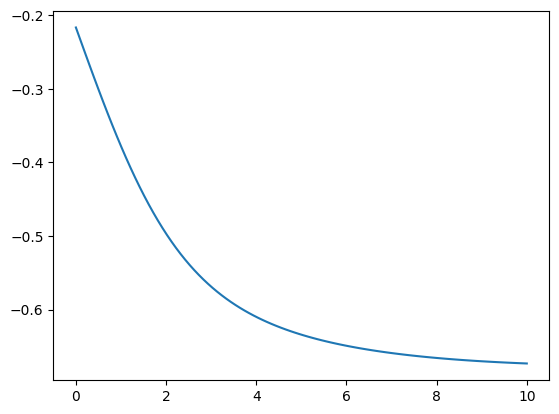

In [ ]:
x=np.linspace(0,10,100)
f=Function(4)
y=f(x)
plt.plot(x,y.numpy()[0])

## How to fit the model to a given function?

We need
1.   A measure to evaluate model fitness
2.   A loss function to find the optimal model
3.   Loss function may be identical to measure (but does not have to)
4. An optimization procedure that minimizes the loss











**TODO 1.2.1** Analyze the code in the cell below and complete the code of MSE function. MSE means Mean Squared Error  

In [ ]:
a = tf.Variable([1.0,2.0,3.0,4.0])
b = tf.Variable([1.1,2.1,3.1,4.1])
e = (a-b)**2
print(e)
mse=tf.math.reduce_sum(e)/e.shape[0]
print(mse)

tf.Tensor([0.01       0.00999998 0.00999998 0.00999998], shape=(4,), dtype=float32)
tf.Tensor(0.009999987, shape=(), dtype=float32)


In [ ]:
def MSE(y_true,y_pred):
  e = (y_true - y_pred)**2
  return tf.math.reduce_sum(e)/e.shape[0]

**TODO 1.2.2** Rewrite sigmoid and rbf functions using  TensorFlow

In [ ]:
def sigmoid(z):
  return 1/(1+tf.exp(-z))

def rbf(z):
  return tf.exp(-z**2)

## The fit method

* Input: x and y
* Iterates multiple times (parameter epoch)
* In each iteration
  * Calculates y_pred = model(x)
  * Computes loss function
  * Computes gradient of loss function with respect to weights
  * Updates weights, basicaly according to the formula $W=W-gradient*learning\_rate$.
  * Actually uses an optimizer that performs this in a smarter way  




In [ ]:
import tensorflow as tf


class Function:
  def __init__(self,n_h,activation = lambda x:x):
    self.f = activation
    self.W0=tf.Variable(np.random.randn(n_h,1)*0.01)
    self.b0=tf.Variable(np.zeros((n_h,1)))
    self.W1=tf.Variable(np.random.randn(1,n_h)*0.01)
    self.b1=tf.Variable(np.zeros((1,1)))


  def __call__(self,x):
    z=self.W0*x+self.b0
    a=self.f(z)
    y=tf.matmul(self.W1,a)+self.b1
    return y


  def fit(self,x,y,epochs=10,optimizer = tf.keras.optimizers.RMSprop()):
    for i in range(epochs):
      with tf.GradientTape() as tape:
        y_pred=self(x)
        loss = MSE(y_pred,y)
        # print(loss)
        variables=(self.W0,self.b0,self.W1,self.b1)
        gradients = tape.gradient(loss, variables)
        # print(gradients)
        optimizer.apply_gradients(zip(gradients, variables))


We will try to fit our model (Function class) to the polynomial function $y=(x-1)(x-6)(x-7)$

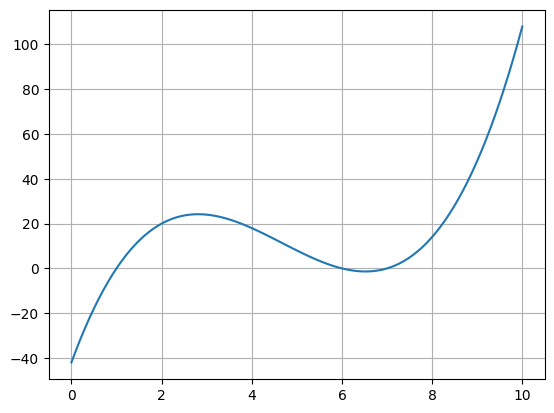

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)

plt.plot(x,y)
plt.grid()


Although the problem is super-easy for classical methods, using this approach is a little bit hard. We need many hidden units and iterations... (execution abot 90 sec)

**TODO 1.2.3** Create a model (Function) object passing as parameters 50 hidden units and rbf activation function. Fit the model setting number of iterations to 5000.

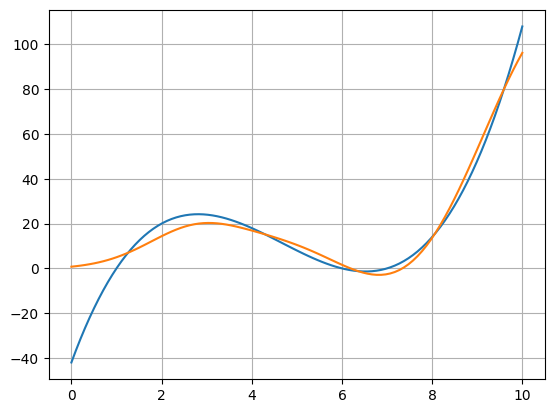

In [ ]:
f=Function(n_h=50, activation=rbf)
f.fit(x, y, epochs=5000)

plt.plot(x,y)
plt.grid()

y_pred=f(x)
plt.plot(x,y_pred.numpy()[0])


**Hyperparameters**
*  n_h (number of hidden neurons) controls the model complexity
*  activation function - influences the model performance
*  epochs - controls number of iterations (influences the learning algorithm)


# 1.3 Neural network model

Analogous model can be built using components of keras library.

*  **Advantage** the computations are converted to form a *computational graph* that can be executed much faster. Also on GPU. This is done with ```compile``` method.

In [ ]:
from keras import models
from keras import layers

def build_model(n_h):
  model = models.Sequential()
  model.add(layers.Dense(n_h, activation=rbf, input_shape=(1,)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])
  return model



**TODO 1.3.1** Create a model with 50 hidden units and call fit function setting number of epochs 5000 and batch_size (another hyperparameter) to 100

In [ ]:
import numpy as np
x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)

model = build_model(50)
history = model.fit(x,y,epochs = 5000,batch_size=100,verbose=0)


Check plots of original and fit curves

4/4 [==============================] - 0s 2ms/step


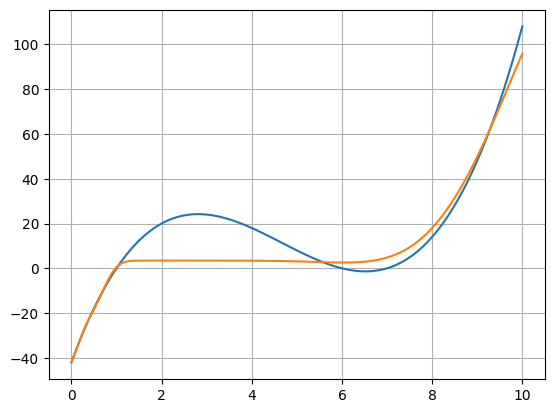

In [ ]:
plt.plot(x,y)
plt.grid()

y_pred=model.predict(x)
plt.plot(x,y_pred)

**TODO 1.3.2** Repat the above steps changing hyperparameters to get a good fit

During training some data are collected. We may display various measures residing in the training history

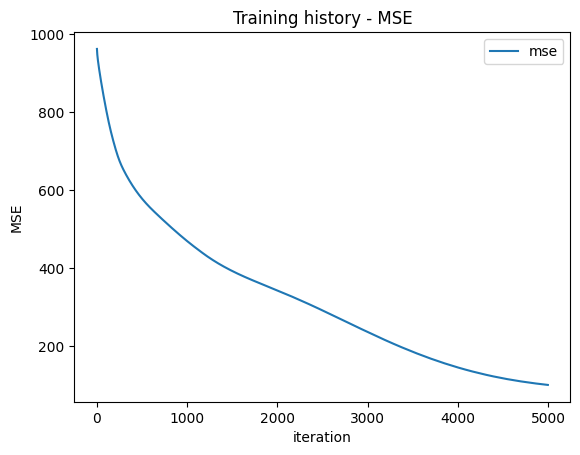

In [ ]:
import matplotlib.pyplot as plt

plt.title('Training history - MSE')
plt.plot(history.history['mse'],label='mse')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend()

# history.history['mse']

# 1.4 More realsitic model
The task of perfectly fitting a known function is very rare.

*  It is rather assumed that we have data that originate from a true underlaying function with a noise $y=f(x)+\varepsilon$
*  It is also often assumed that $\varepsilon \sim N(0,\sigma)$

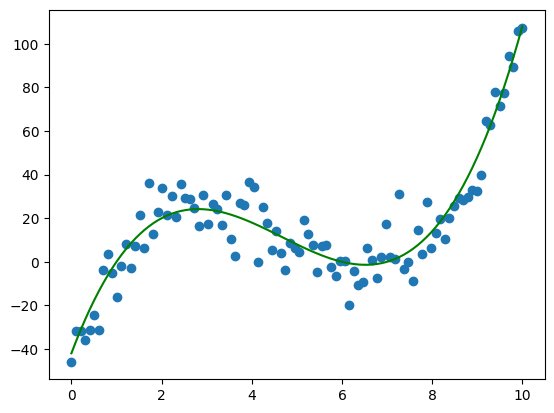

In [ ]:
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

n_size=100
x = np.linspace(0,10,n_size)
y = (x-1)*(x-6)*(x-7)+np.random.normal(0,10,n_size)

plt.scatter(x,y)
plt.plot(x,(x-1)*(x-6)*(x-7),color='g')



**TODO 1.4.1** Fit the model to this DATA using the best hyperparameters obtained before

In [ ]:
model = build_model(50)
history = model.fit(x, y, epochs=10000, batch_size=100, verbose=0)

**TODO 1.4.2** Plot the scattered data, true function in green and predictions in red

4/4 [==============================] - 0s 2ms/step


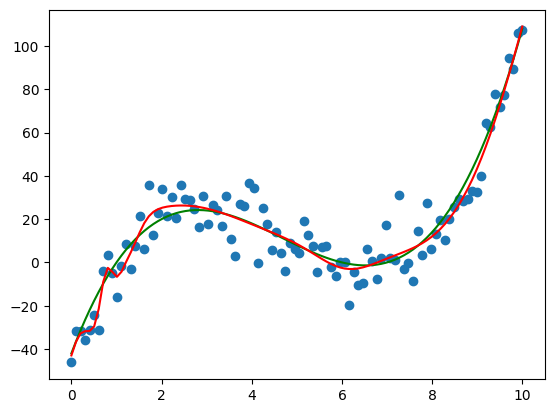

In [ ]:
plt.scatter(x,y)
plt.plot(x,(x-1)*(x-6)*(x-7),color='g')
y_pred=model.predict(x)
plt.plot(x,y_pred,color='r')

# 1.5 Validating model - training and testing

Typical ML workflow includes training the model and testing its performance on unseen data.

* **Why** - to control and assess generalization error which may result from
    * underfitting - the model is to simple or not trained enough
    * overfitting - the model is too complex, matches perfectly the training data (see part of the plot on the left)  

We will split the data into two subsets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)


**TODO 1.5.1** Fit the model using x_train and y_train, set the parameter ```validation_data=(x_test, y_test)```

Warning: training lasts up to 250 sec

In [ ]:
model = build_model(50)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10000, batch_size=100, verbose=0)


We will display true function, noisy data and predictions

1/1 [==============================] - 0s 44ms/step


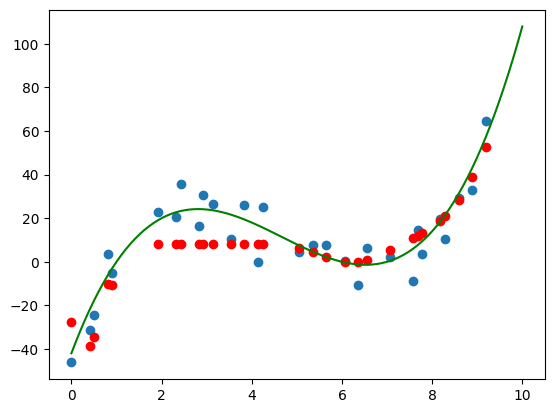

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x,(x-1)*(x-6)*(x-7),color='g')
y_pred=model.predict(x_test)
plt.scatter(x_test,y_pred,color='r')

Lets peek what is the content of the history...

In [ ]:
for k in history.history:
  print(k)

loss
mse
mae
val_loss
val_mse
val_mae


**TODO 1.5.2** Display loss (training loss) and val_loss (validation loss on the test set)

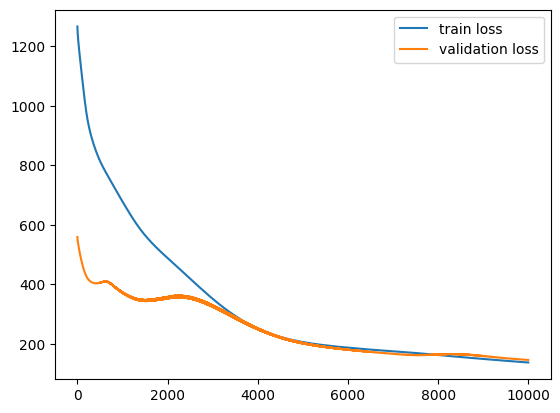

In [ ]:
plt.plot(history.history['loss'] , label='train loss')
plt.plot(history.history['val_loss']  , label='validation loss')
plt.legend()


# 1.6 Classification
Function models can be used for classification, provided we constrain them to return probabilities, i.e.  values from [0,1] interval.

* Function with one output may be used for binary classification:
  *  Assign $label_0$ if $f(x) <0.5$
  *  Assign $label_1$ if $f(x) \ge 0.5$

**TODO 1.6.1**Which function converts $R \to [0,1]$? Answer the question

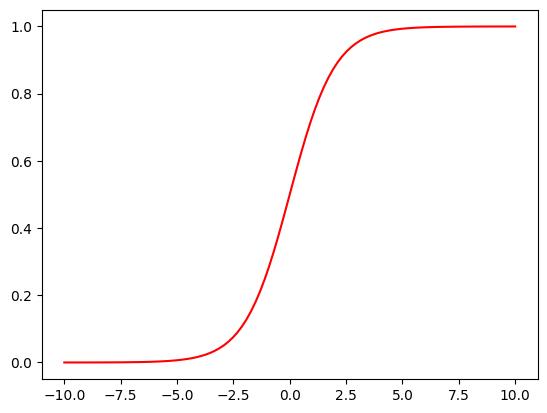

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)

plt.plot(x,(lambda x: 1/(1+np.exp(-x)))(x),c='r')

We will generate a dataset. Points above the previously used polynomial will have blue label, the points below red.

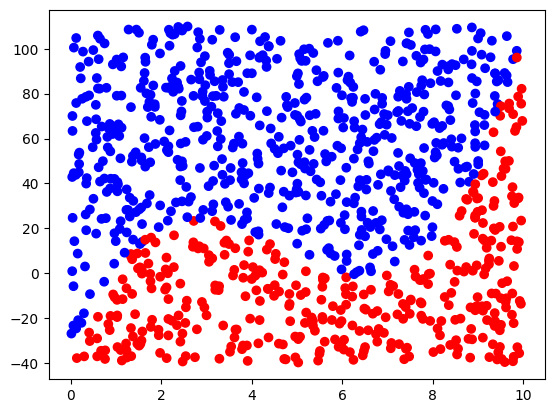

In [ ]:
X = np.random.rand(1000,2)*[10,150]-[0,40]
y = np.where(X[:,1]>(X[:,0]-1)*(X[:,0]-6)*(X[:,0]-7),1,0)
# y.shape

from matplotlib.colors import ListedColormap
cm = ListedColormap(['r', 'b'])
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)

We will biuld a model more suitable for classification.

What is binary_crossentropy aka. logloss?

$loss_i= -[ y_i\cdot ln(p_i) + (1-y_i)\cdot ln(1-p_i)]$

You may google the term...

In [ ]:
import tensorflow as tf


def build_classification_model(n_h):
  model = models.Sequential()
  model.add(layers.Dense(n_h, activation='relu', input_shape=(2,)))
  model.add(layers.Dense(n_h, activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model



**TODO 1.6.2** fit the model using training data. Set about 100 epochs, use X_test and y_test as validation data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = build_classification_model(10)
history = model.fit(X_train,y_train,epochs = 100,validation_data=(X_test, y_test),verbose=0,batch_size = 100)

Display predictions and the polynomial curve which was used to separate class instances.

10/10 [==============================] - 0s 5ms/step


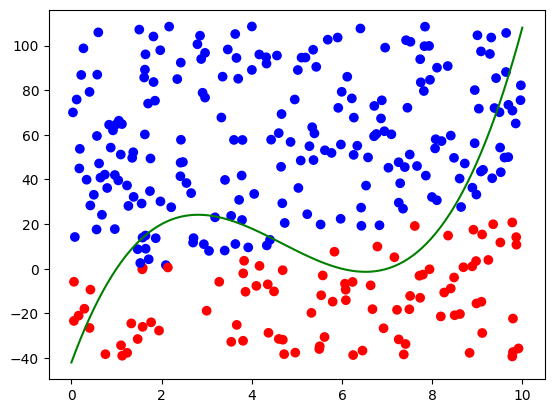

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap=cm)
x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)
plt.plot(x,y,color='g')